In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [29]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [30]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [31]:
df.shape

(103, 7)

# Data Cleaning


In [32]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')

In [33]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [35]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [36]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [37]:
df[df['Acreage(Hectare)'].isna()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [38]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [39]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [40]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [41]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_person(Kg)'] = df['Production_per_person(Kg)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)

In [42]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [43]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [44]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent?

In [45]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

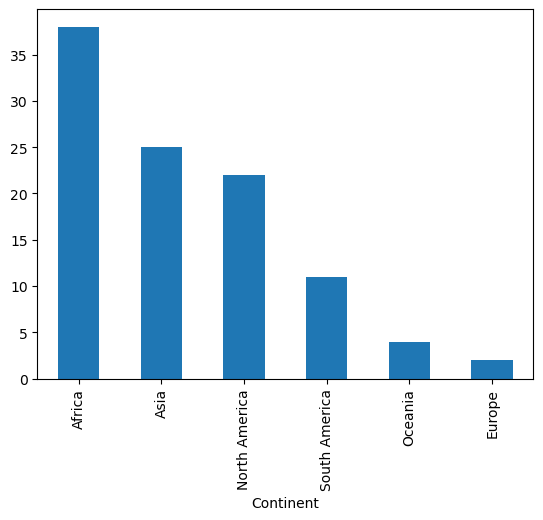

In [46]:
df['Continent'].value_counts().plot(kind = 'bar')

C:\Users\Ramzal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ramzal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ramzal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ramzal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

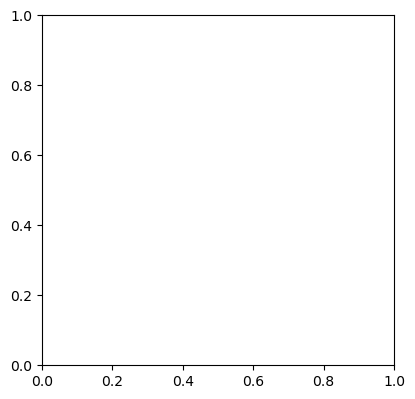

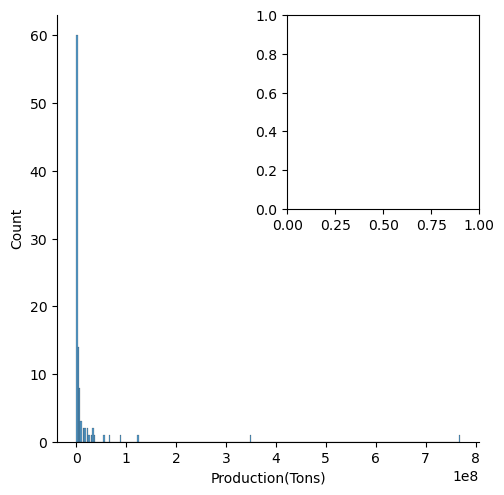

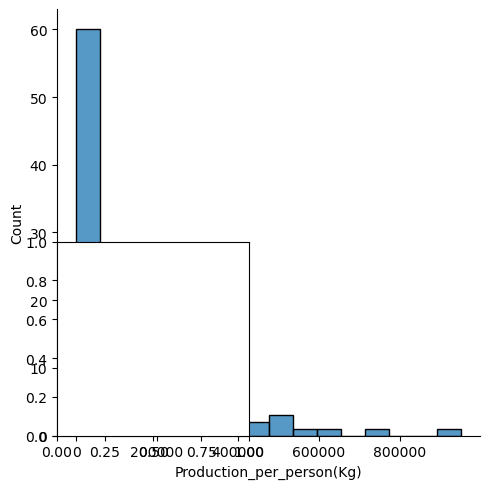

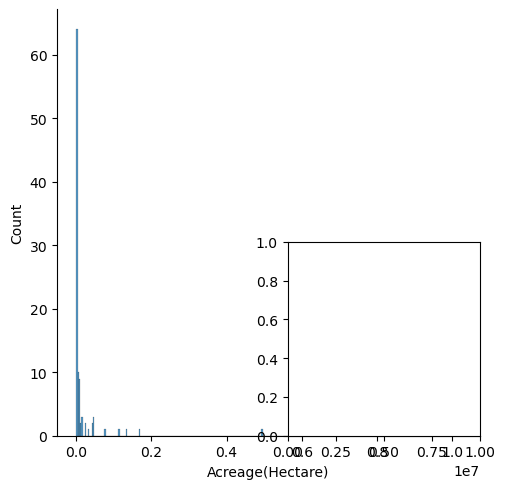

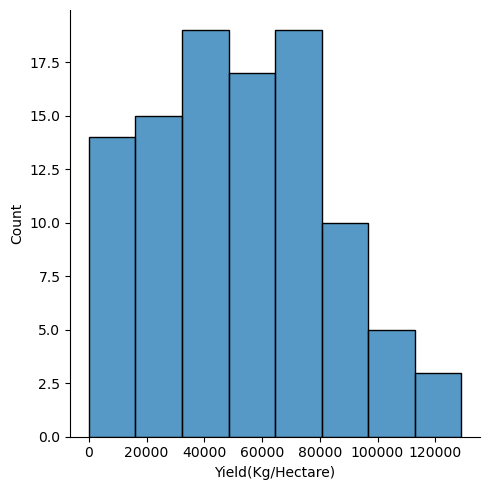

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.displot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.displot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.displot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.displot(df['Yield(Kg/Hectare)'])